# Main

### Desarrollado por: Beirute, Campos, Gómez y Hernández

Se va a desarrollar el proyecto en este archivo de jupyter. 

### 1. Importamos las librerías y los módulos de algunas librerías

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Lectura de datos

In [2]:
# Devuelve el directorio de un nombre de ruta dado
ruta_base = os.getcwd() 
ruta_data = os.path.join(ruta_base, "..", "data", "loan_data.csv")

# Cargar el CSV
df_loan = pd.read_csv(ruta_data)

### 3. Visualización de datos

In [3]:
# Visualizamos primeras 5 filas de la df 
df_loan.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
# Imprimimos codigo de latex para primeras 5 filas
# df_loan.round(2).head().to_latex(index = 0)

# Obtener el resumen de 5 números de las variables numéricas
df_loan.describe().loc[['min', '25%', '50%', '75%', 'max']]

credit.policy  int.rate  installment  log.annual.inc      dti   fico  \
min            0.0    0.0600      15.6700        7.547502   0.0000  612.0   
25%            1.0    0.1039     163.7700       10.558414   7.2125  682.0   
50%            1.0    0.1221     268.9500       10.928884  12.6650  707.0   
75%            1.0    0.1407     432.7625       11.291293  17.9500  737.0   
max            1.0    0.2164     940.1400       14.528354  29.9600  827.0   

     days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
min         178.958333        0.0         0.0             0.0          0.0   
25%        2820.000000     3187.0        22.6             0.0          0.0   
50%        4139.958333     8596.0        46.3             1.0          0.0   
75%        5730.000000    18249.5        70.9             2.0          0.0   
max       17639.958330  1207359.0       119.0            33.0         13.0   

     pub.rec  not.fully.paid  
min      0.0             0.0  
25%      0.0             0.0  
50%      0.0             0.0  
75%      0.0             0.0  
max      5.0             1.0

### 4. Análisis variables cuantitativas

<Figure size 1200x600 with 0 Axes>

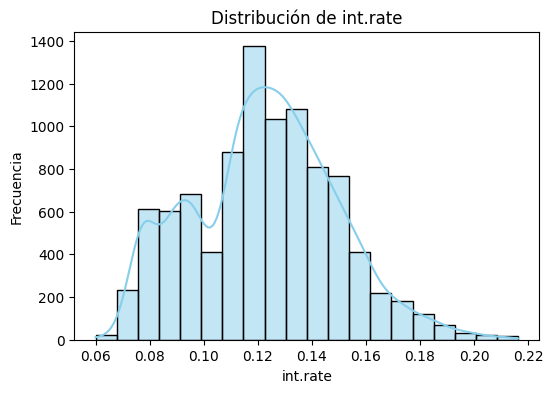

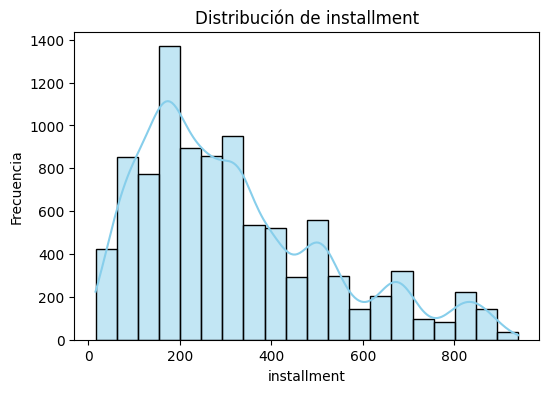

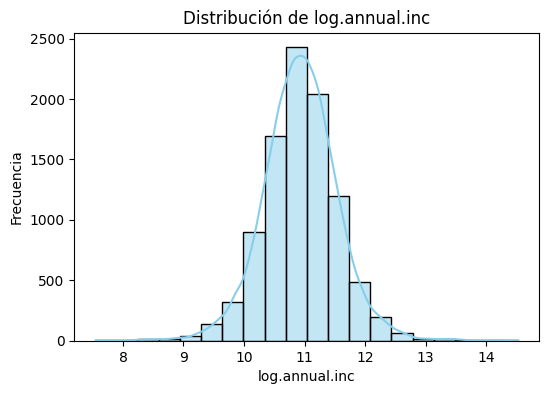

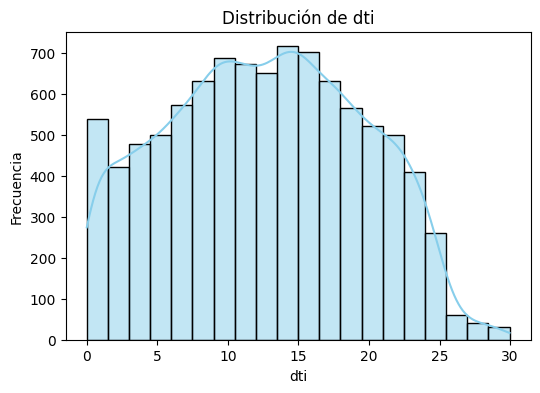

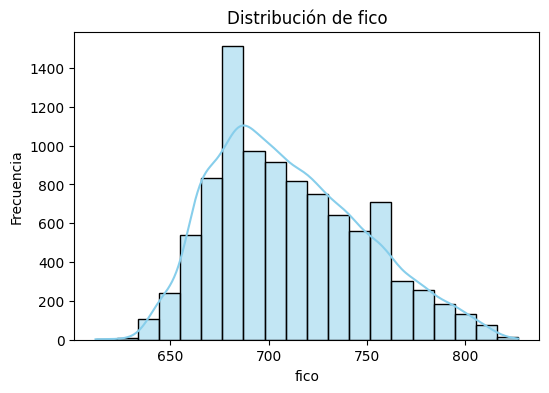

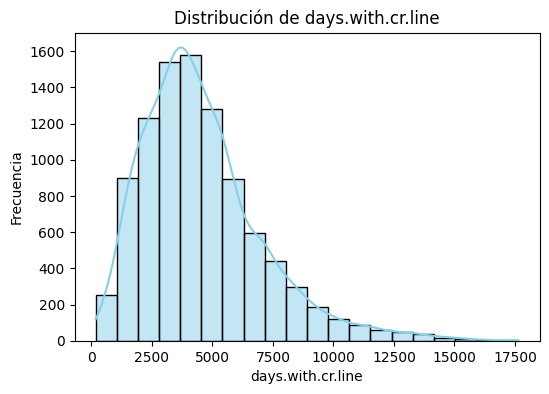

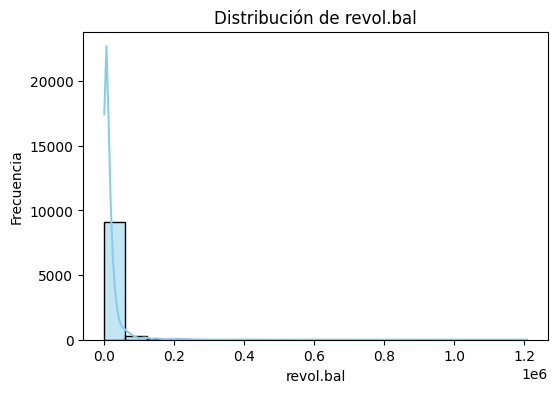

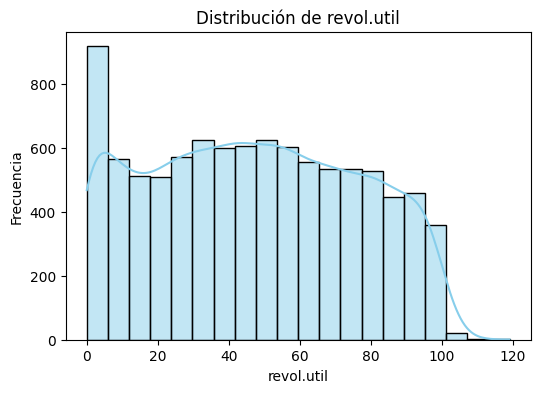

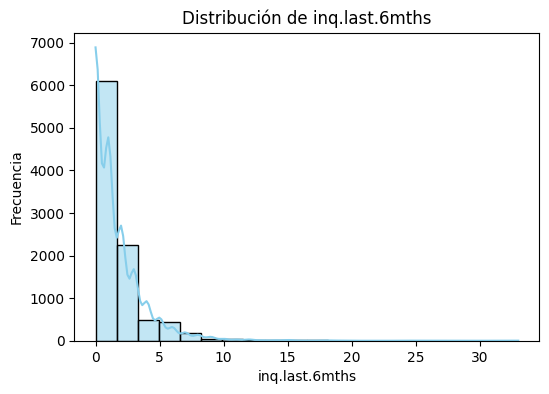

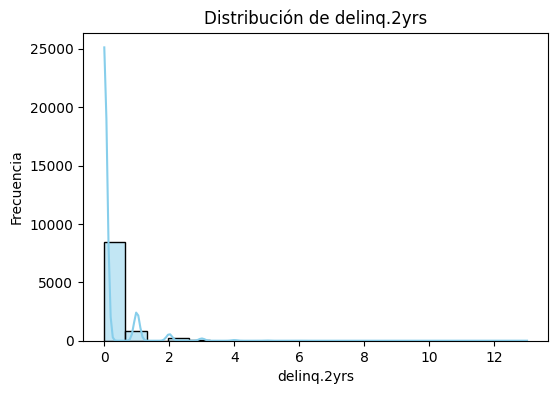

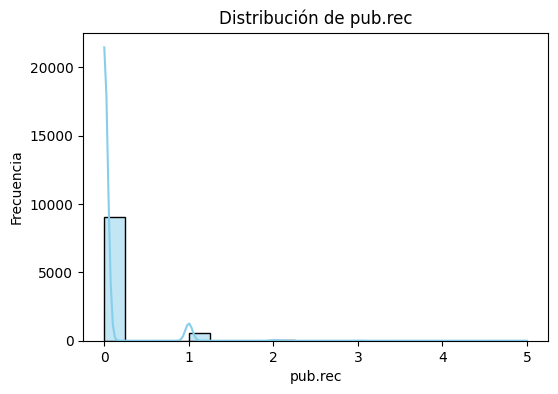

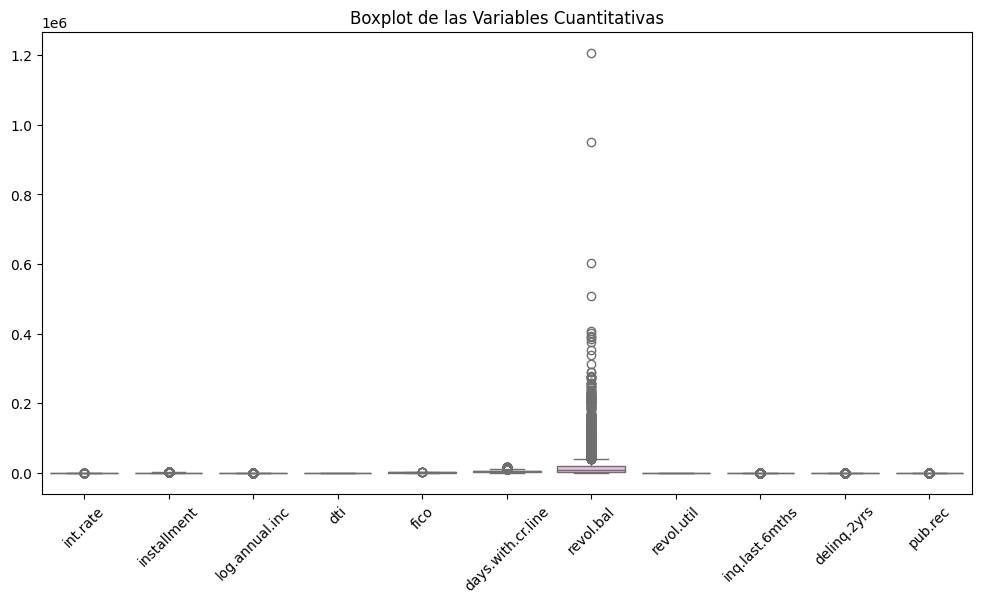

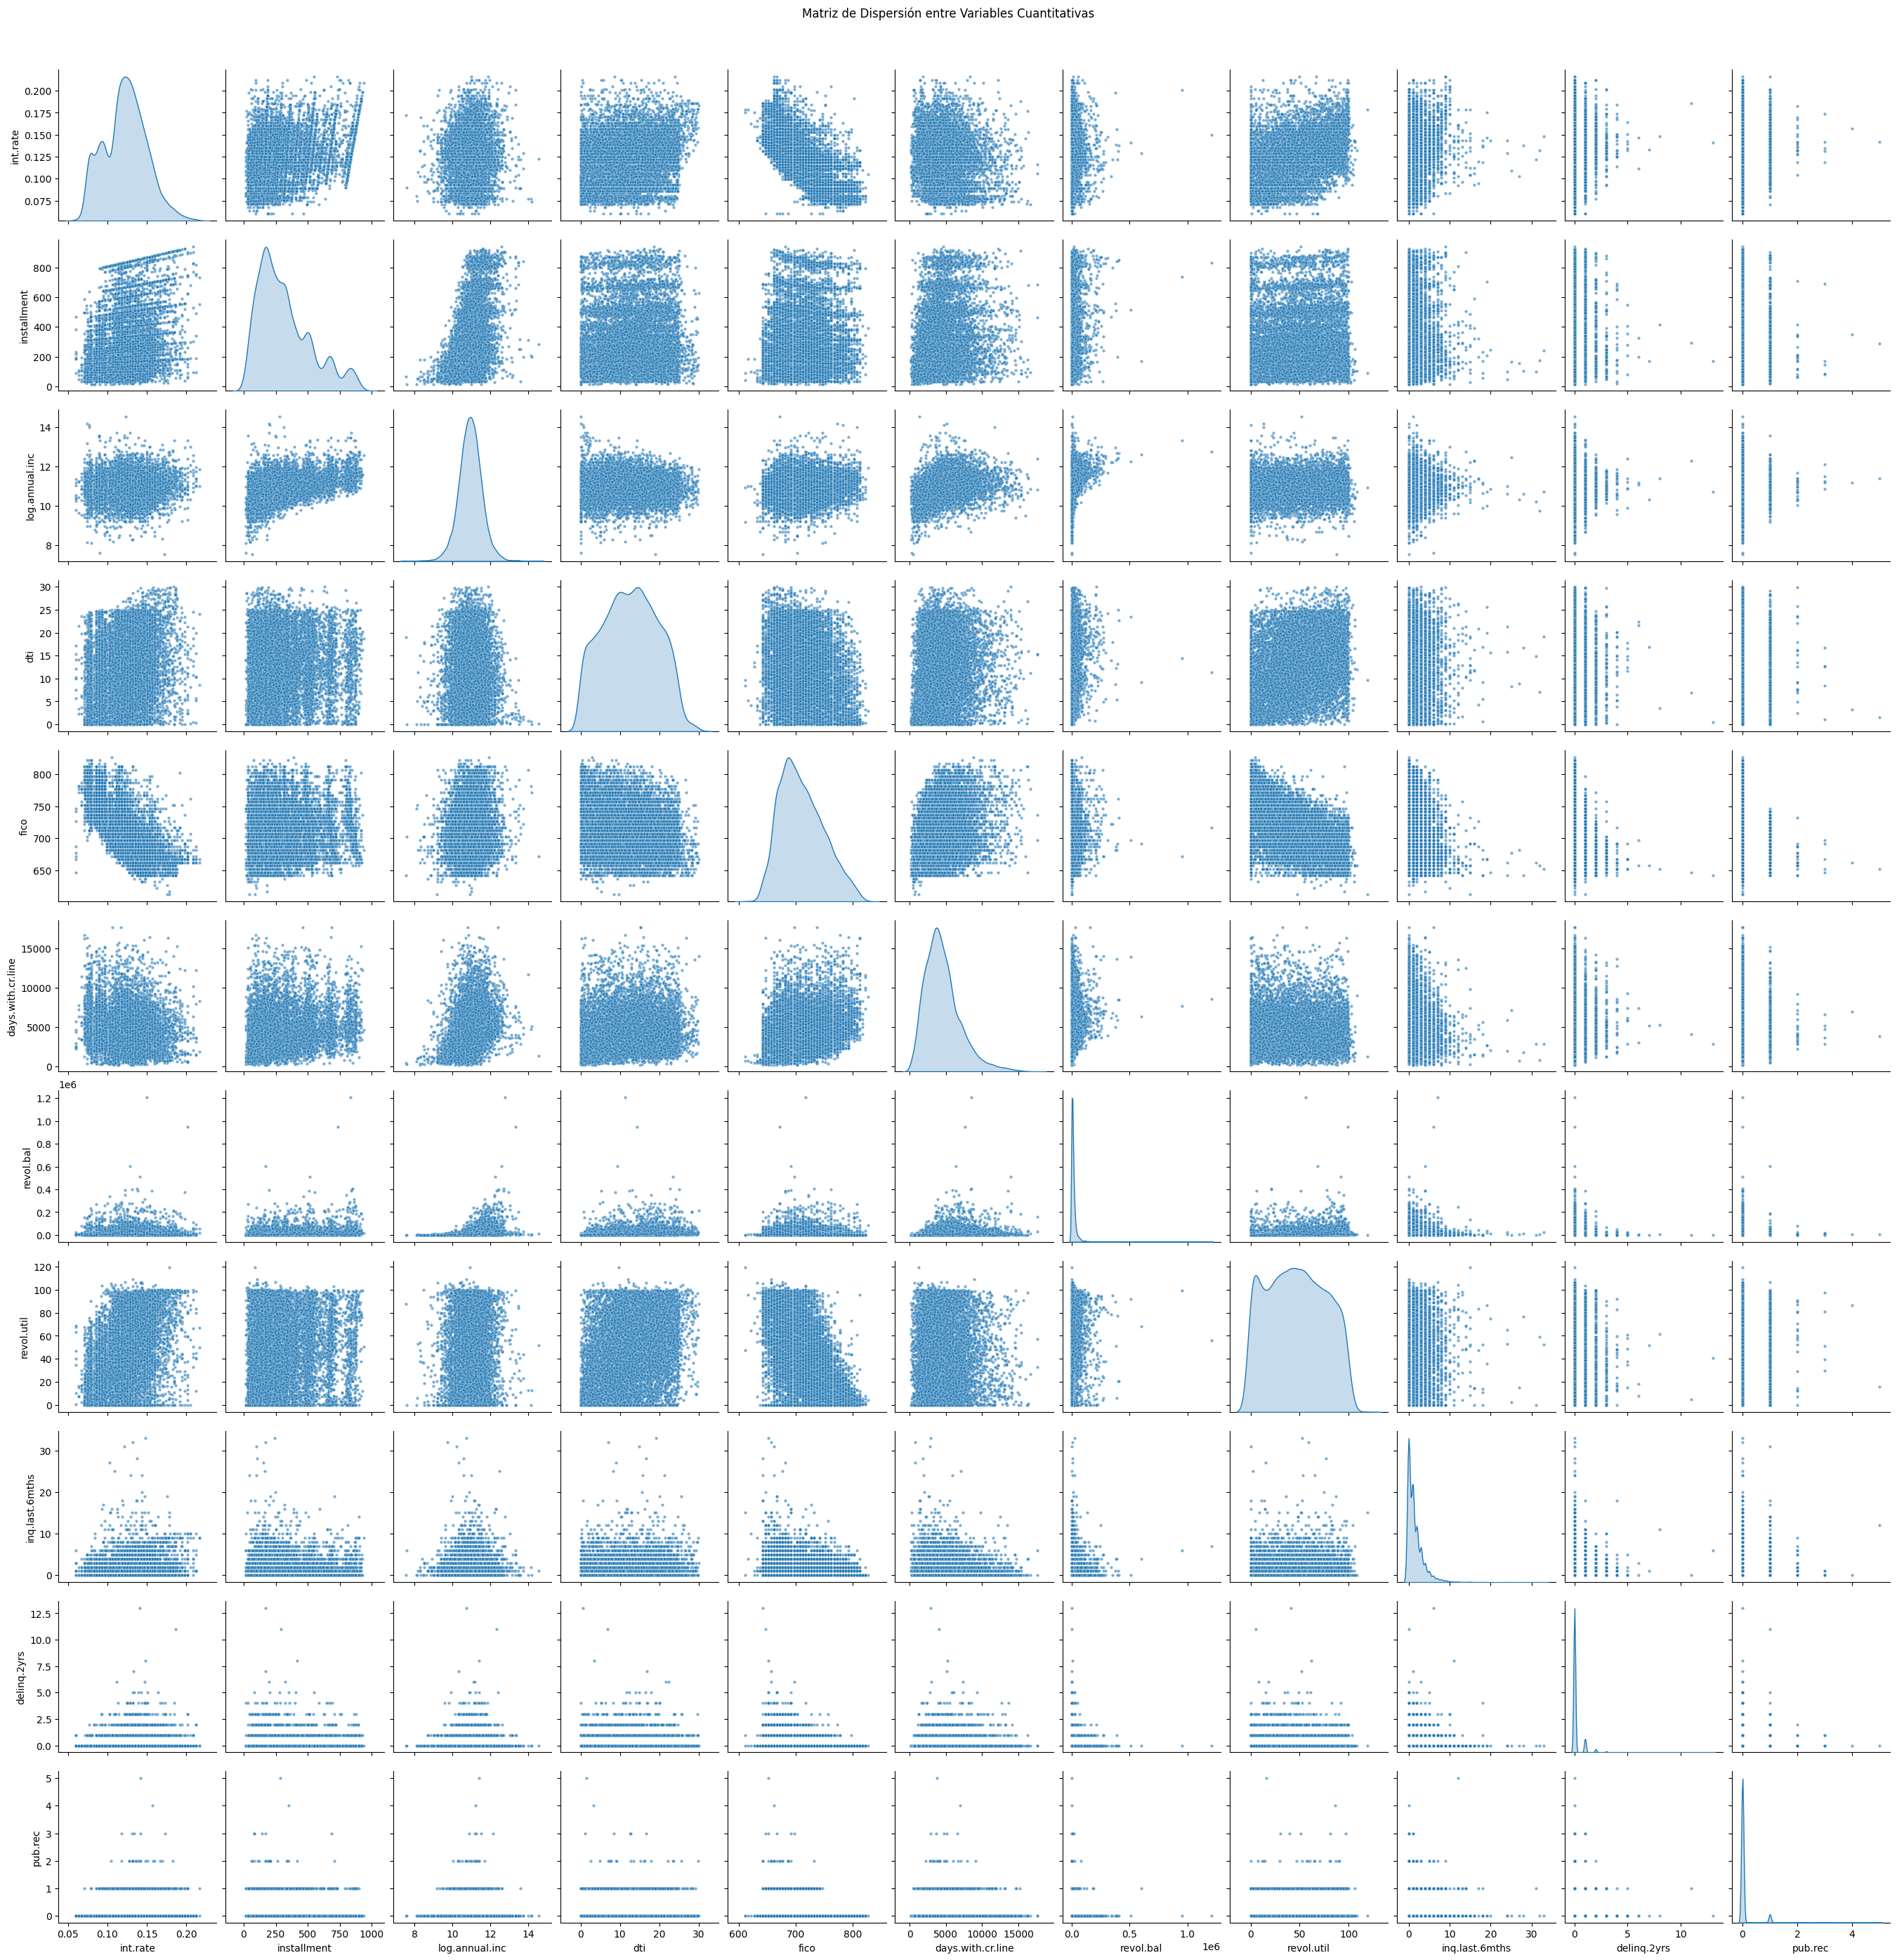

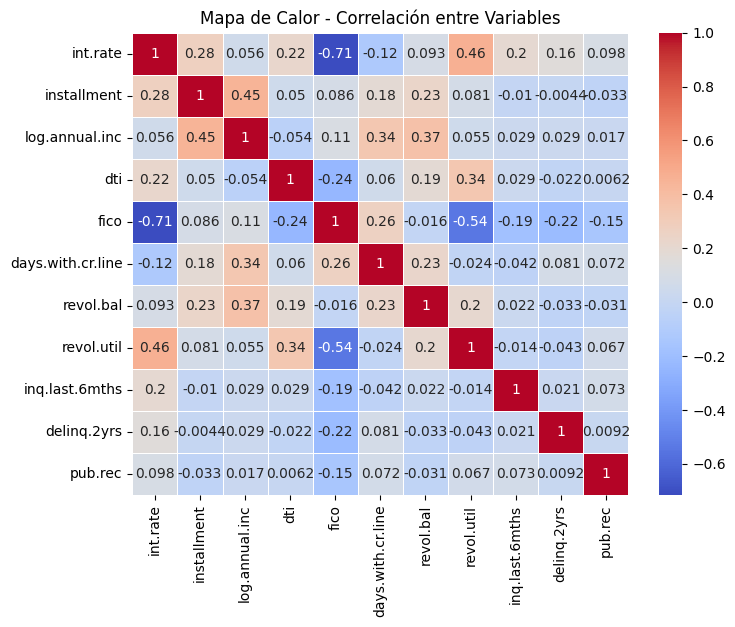

In [5]:
# Filtrar solo columnas numéricas
datos_cuantitativos = df_loan.select_dtypes(include=['number']).drop(columns=['credit.policy', 'not.fully.paid'])

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear histogramas para cada variable cuantitativa
for columna in datos_cuantitativos.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_loan[columna], kde=True, bins=20, color="skyblue")
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()
    

# Crear boxplots para visualizar la dispersión
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_cuantitativos, palette="pastel")
plt.title("Boxplot de las Variables Cuantitativas")
plt.xticks(rotation=45)
plt.show()


# Matriz de dispersión
sns.pairplot(datos_cuantitativos, diag_kind="kde", plot_kws={'alpha':0.6, 's':10})
plt.suptitle("Matriz de Dispersión entre Variables Cuantitativas", y=1.02)
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(datos_cuantitativos.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.show()


### 5. Análisis variables cualitativa

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64
credit.policy
1    7710
0    1868
Name: count, dtype: int64


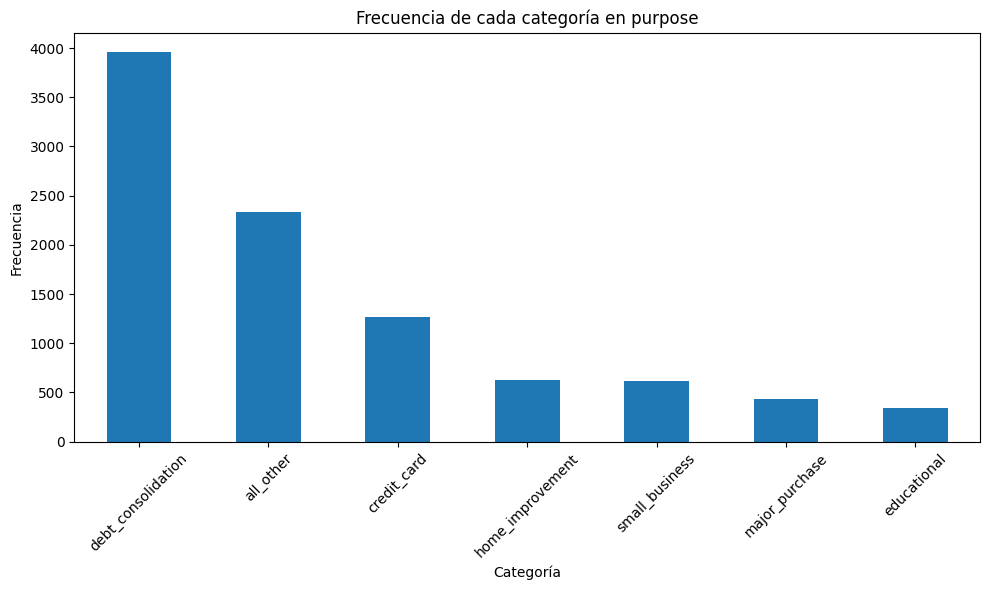

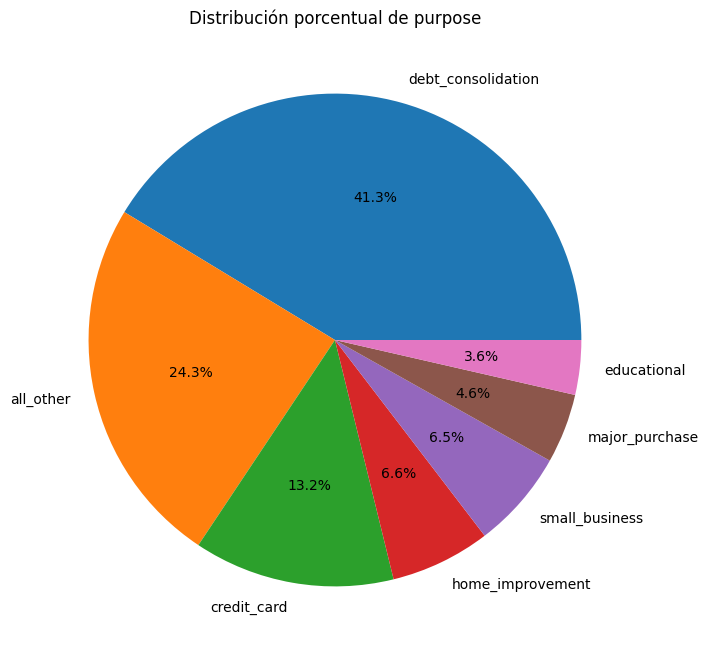

In [6]:
# Sabemos que hay 3 variables cualitativas
df_loan['credit.policy'].astype("category")
df_loan['purpose'].astype("category")
df_loan['not.fully.paid'].astype("category")


# Queremos saber el # de 0s y 1s para dos de esas variables
print(df_loan['not.fully.paid'].value_counts())
print(df_loan['credit.policy'].value_counts())


# Distribución de variable purpose
df_loan['purpose'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de cada categoría en purpose')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribución porcentual
df_loan['purpose'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribución porcentual de purpose')
plt.ylabel('')  
plt.show()

### 6. Detección de valores nulos

In [7]:
# Para cada variable, sumamos los valores nulos
valores_faltantes = df_loan.isnull().sum()

# No hay valores nulos
print(df_loan.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


### 7. Valores faltantes

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
                   outliers  porcentaje
int.rate               51.0        0.53
installment           236.0        2.46
log.annual.inc        238.0        2.48
dti                     0.0        0.00
fico                    6.0        0.06
days.with.cr.line     346.0        3.61
revol.bal             780.0        8.14
revol.util              0.0        0.00
inq.last.6mths        478.0        4.99
delinq.2yrs          1120.0       11.69
pub.rec               559.0        5.84


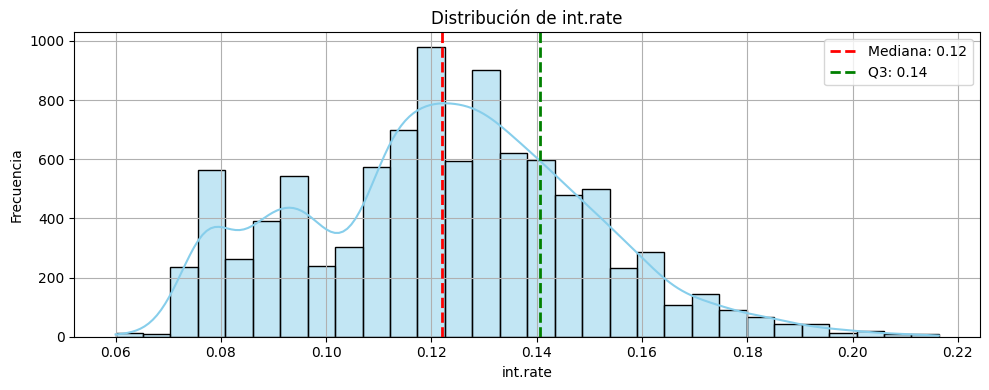

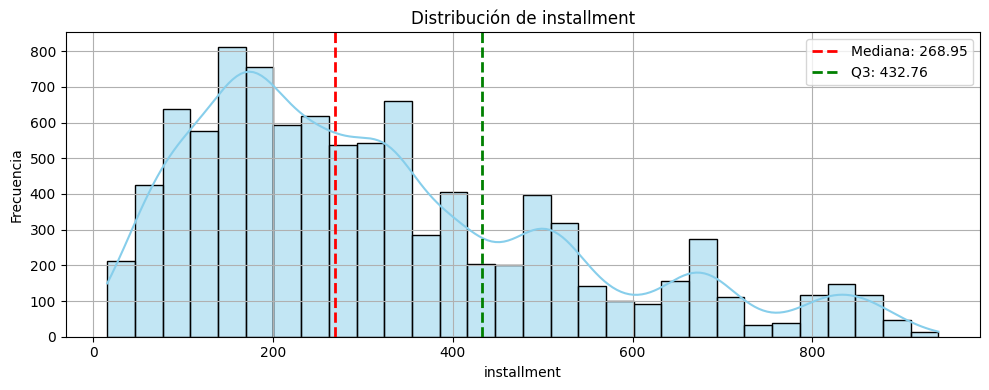

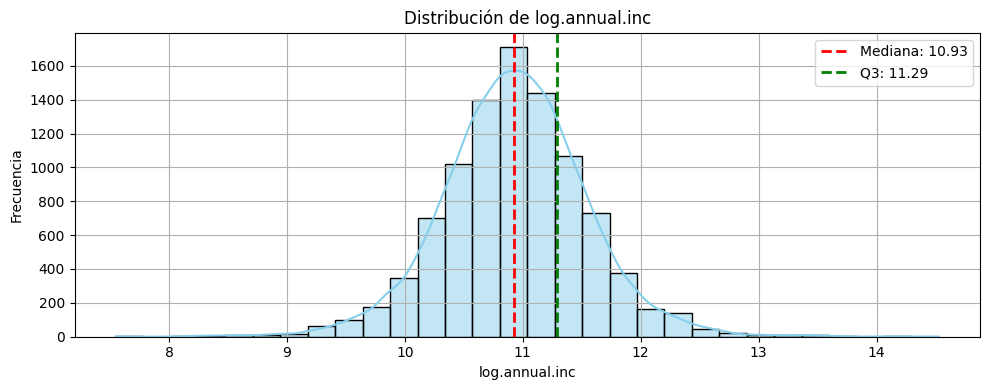

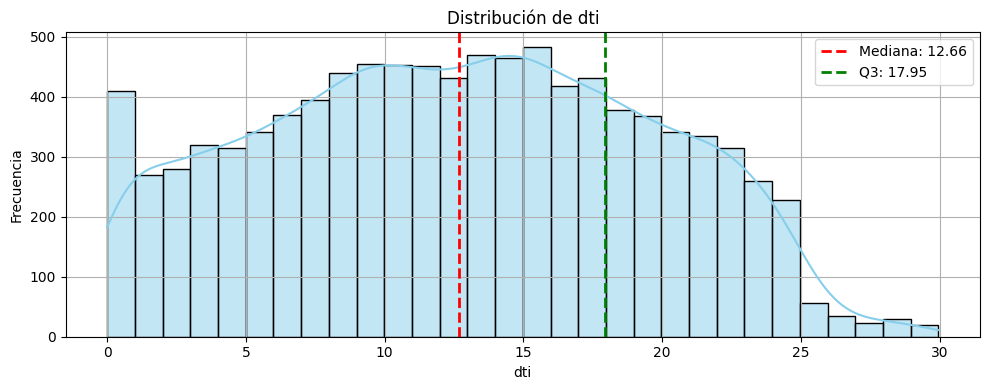

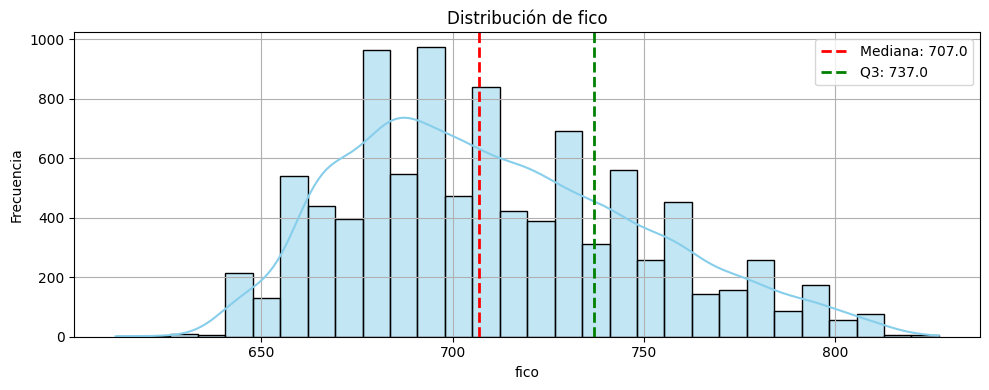

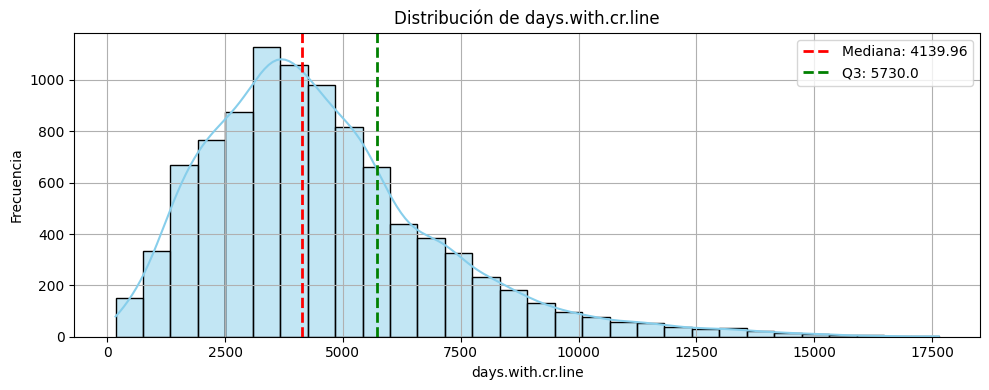

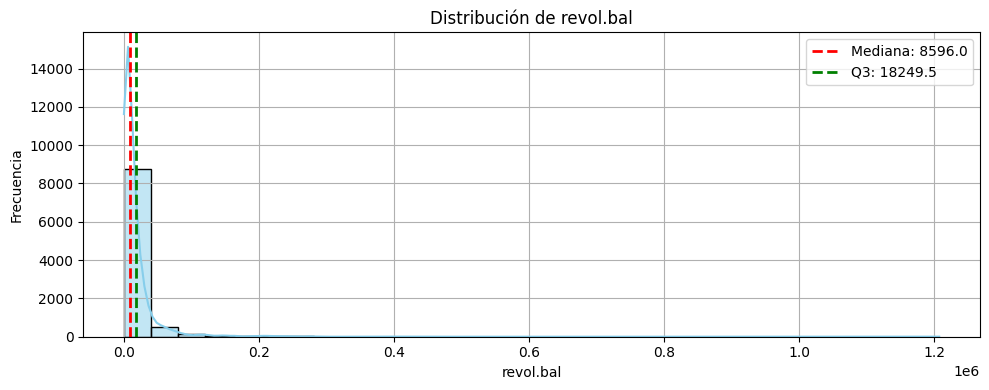

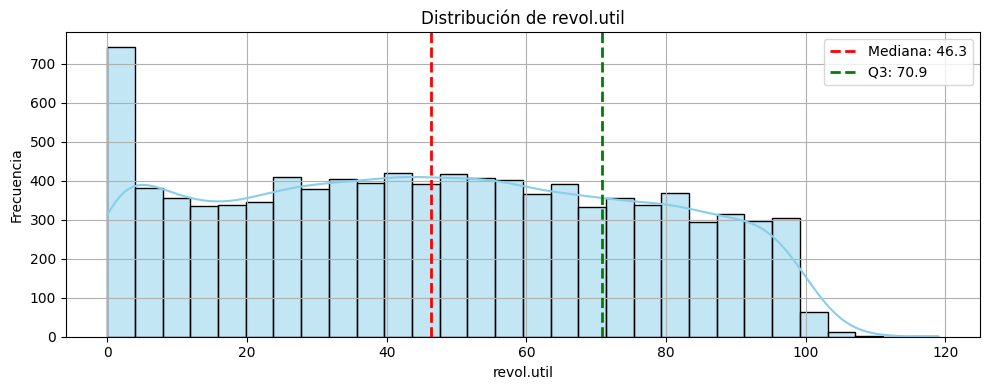

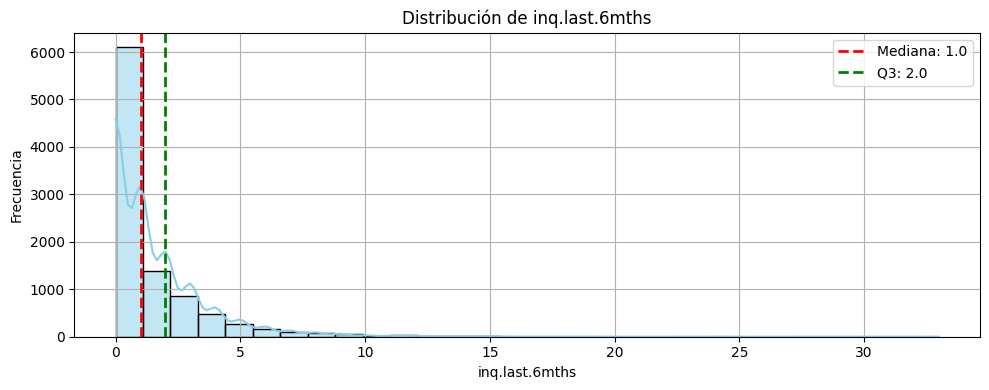

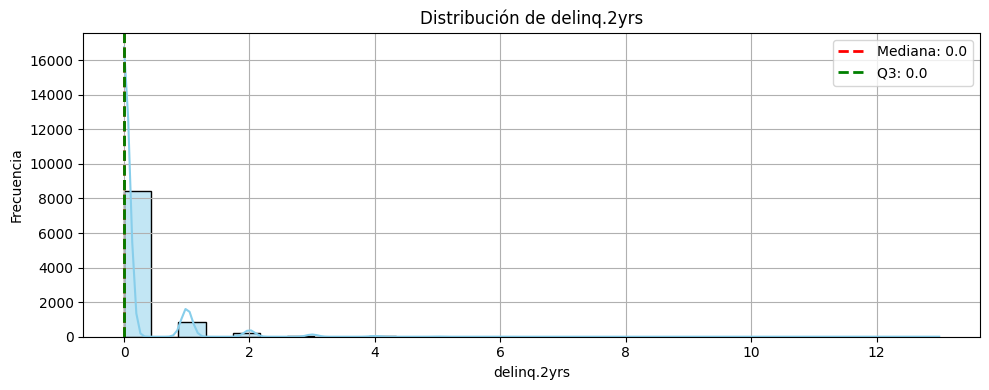

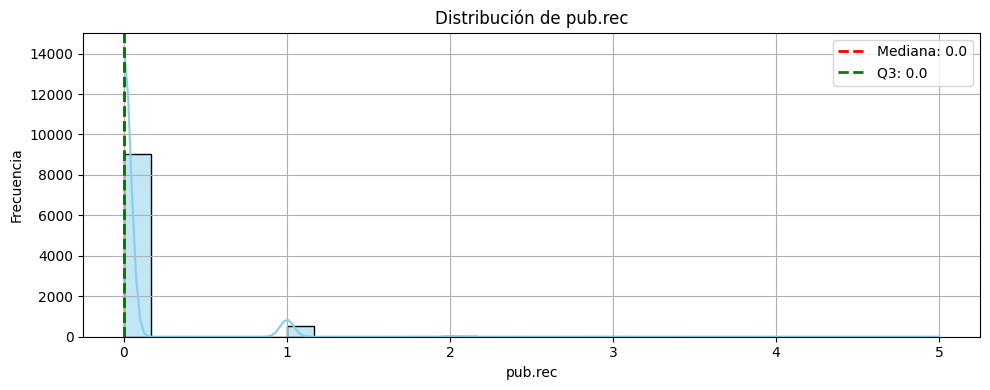

In [8]:
# Para cada variable, sumamos los valores nulos
valores_faltantes = df_loan.isnull().sum()

# No hay valores nulos
print(df_loan.isnull().sum())

# Detectar outliers ---------------------------------------------------------

# Seleccionamos solo variables numéricas y excluimos las variables cualitativas
numericas = df_loan.select_dtypes(include=['float64', 'int64']).drop(columns=['credit.policy', 'not.fully.paid'])

# Detectar outliers por variable
outliers = {}

for col in numericas.columns:
    Q1 = df_loan[col].quantile(0.25)
    Q3 = df_loan[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outlier_cond = (df_loan[col] < limite_inferior) | (df_loan[col] > limite_superior)
    total_outliers = outlier_cond.sum()

    outliers[col] = {
        'outliers': total_outliers,
        'porcentaje': round(total_outliers / len(df_loan) * 100, 2)
    }

# Mostrar resultados
outliers_df = pd.DataFrame(outliers).T
print(outliers_df)


# Para presentar resultados en tabla

# Crear lista para almacenar los resultados
tabla = []

# Calcular estadísticas para cada variable numérica
for col in numericas.columns:
    serie = numericas[col]
    
    # Cuartiles y extremos
    min_val = serie.min()
    Q1 = serie.quantile(0.25)
    Q2 = serie.quantile(0.5)
    Q3 = serie.quantile(0.75)
    max_val = serie.max()
    
    # Conteo de observaciones en los rangos solicitados
    count_min_q1 = ((serie >= min_val) & (serie < Q1)).sum()
    count_q3_max = ((serie > Q3) & (serie <= max_val)).sum()
    
    # Añadir fila a la tabla
    tabla.append({
        'Variable': col,
        'Mínimo': round(min_val, 2),
        'Q1': round(Q1, 2),
        'Q2 (Mediana)': round(Q2, 2),
        'Q3': round(Q3, 2),
        'Máximo': round(max_val, 2),
        'Valores entre Mínimo y Q1': count_min_q1,
        'Valores entre Q3 y Máximo': count_q3_max
    })

# Convertir a DataFrame
tabla_df = pd.DataFrame(tabla)

# Graficar distribuciones con estadísticos -----------------------------------

def graficar_distribuciones(df, excluir=[]):
    """
    Grafica la distribución de cada variable numérica (excepto las excluidas),
    incluyendo líneas verticales para la mediana y el tercer cuartil (Q3).
    
    Parámetros:
        df (pd.DataFrame): DataFrame original
        excluir (list): lista de columnas a excluir
    """
    df_numericas = df.select_dtypes(include=['float64', 'int64'])

    for col in df_numericas.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')

        # Calcular valores estadísticos
        mediana = df[col].median()
        q3 = df[col].quantile(0.75)

        # Añadir líneas verticales
        plt.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {round(mediana, 2)}')
        plt.axvline(q3, color='green', linestyle='--', linewidth=2, label=f'Q3: {round(q3, 2)}')

        # Etiquetas
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
excluir = []        
graficar_distribuciones(numericas,excluir)


# Resolver el problema de outliers -------------------------------------------

# 1. Binarizar `pub.rec`: 0 = sin registros, 1 = con al menos uno
df_loan['pub.rec_flag'] = df_loan['pub.rec'].apply(lambda x: 1 if x > 0 else 0)

# 2. Agrupar `delinq.2yrs`: '0' vs '1 o más'
df_loan['delinq.2yrs_binned'] = df_loan['delinq.2yrs'].apply(lambda x: '0' if x == 0 else '1+')

# 3. Transformar `revol.bal` con logaritmo para reducir asimetría
df_loan['log.revol.bal'] = np.log1p(df_loan['revol.bal'])  # log(x + 1) evita log(0)

### 8. Aplicación del modelo AdaBoost 

Mejores hiperparámetros: {'clasificador__estimator__max_depth': 3, 'clasificador__learning_rate': 0.005, 'clasificador__n_estimators': 30}

Mejor umbral: 0.25
Mejor F1-score (clase 1): 0.3309

Reporte de Clasificación (Adaboost):
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      8045
           1       0.26      0.54      0.35      1533

    accuracy                           0.68      9578
   macro avg       0.58      0.63      0.57      9578
weighted avg       0.79      0.68      0.72      9578


Top 10 variables más importantes:
                            Variable  Importancia
10               remainder__int.rate     0.535644
9           remainder__credit.policy     0.265069
14                   remainder__fico     0.054440
18         remainder__inq.last.6mths     0.044075
11            remainder__installment     0.041447
6     onehot__purpose_small_business     0.036604
12         remainder__log.annual.inc     0.017277
17      

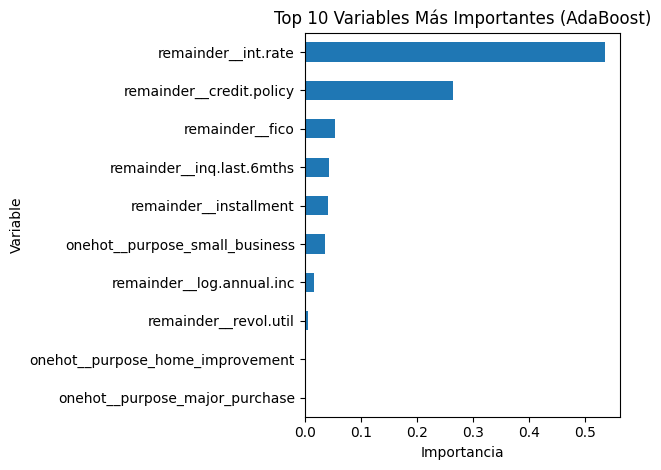

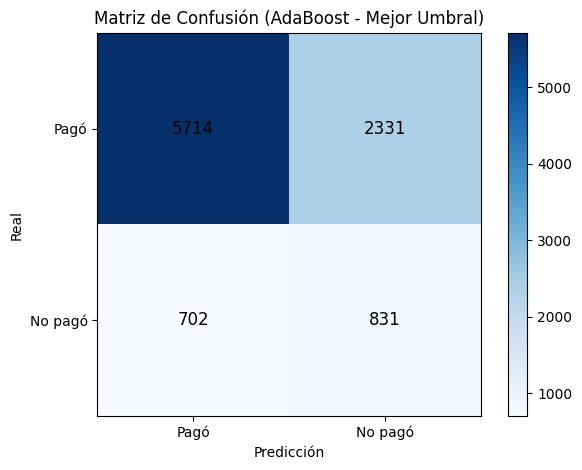

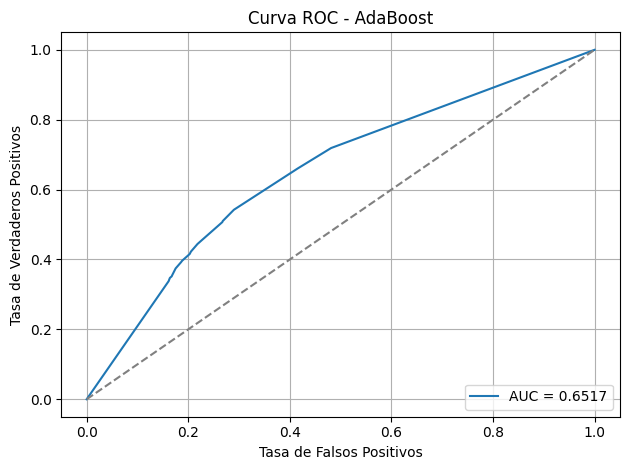

In [18]:
# Paquetes
import matplotlib.pyplot as plt # Librería para crear gráficos
from sklearn.model_selection import StratifiedKFold, GridSearchCV  # StratifiedKFold para validación cruzada estratificada. GridSearchCV para búsqueda de hiperparámetros
from sklearn.preprocessing import OneHotEncoder  # Codificador para variables categóricas (convierte categorías en variables dummy)
from sklearn.compose import ColumnTransformer  # Permite aplicar diferentes transformaciones a diferentes columnas en un pipeline
from sklearn.pipeline import Pipeline  # Estructura para encadenar pasos de preprocesamiento y modelado de manera ordenada
from sklearn.ensemble import AdaBoostClassifier # clasificador
from sklearn.tree import DecisionTreeClassifier # para el clasificador débil del AdaBoost
from sklearn.metrics import (f1_score, classification_report, confusion_matrix, make_scorer, roc_curve, roc_auc_score) # resultados
import warnings # ocultar todas las advertencias
warnings.filterwarnings("ignore")

# Separar en dos df's: X variables de entrada, Y variable de salida (not.fully.paid)
X = df_loan.drop("not.fully.paid", axis=1)
Y = df_loan["not.fully.paid"]

# Separarar las variables categoricas
variables_categoricas = ['purpose', 'delinq.2yrs_binned']
variables_numericas = X.drop(columns=variables_categoricas).columns.tolist()

# Transformador de columnas categóricas en dummies
# Aplica OneHotEncoder (con drop="first") solo a las columnas categóricas y deja pasar las otras columnas numéricas tal como están
preprocesar_datos = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), variables_categoricas)
], remainder='passthrough')

# Clasificador AdaBoost con árbol de decisión
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(class_weight="balanced"),
    random_state=2500
)

# Crear el objeto Pipeline
pipeline = Pipeline([
    ("preprocesar", preprocesar_datos),
    ("clasificador", adaboost)
])

# Se definen los hiperparámetros a evaluar
param_grid = {
    # Número de modelos débiles que va a usar el AdaBoost
    'clasificador__n_estimators': [10, 20, 30, 50, 75, 100, 200, 300],
    # Define qué tanto contribuye cada modelo débil al resultado final, entre más bajo más lento y cuidadoso, entre más alto más posibilidad de overfitting
    'clasificador__learning_rate': [0.005, 0.01, 0.02],
    # Profundidad máxima de cada árbol, un arbol muy profundo puede sobreajustar
    'clasificador__estimator__max_depth': [1, 2, 3]
}

#  GridSearchCV con validación cruzada estratificada y F1-score clase 1
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2500)
scorer = make_scorer(f1_score, pos_label=1)
grid = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=skf, n_jobs=-1)
grid.fit(X, Y)
mejor_modelo = grid.best_estimator_
print("Mejores hiperparámetros:", grid.best_params_)

# Validación cruzada para obtener probabilidades utilizando modoelo previamente optimizado con gridsearchcv
umbrales = np.arange(0.10, 0.50, 0.05)
Y_probabilidades = np.zeros_like(Y, dtype=float)
Y_reales = np.zeros_like(Y)

for train_idx, test_idx in skf.split(X, Y):

    # Para cada fold, se entrena el modelo utilizando únicamente los datos de entrenamiento de ese subconjunto 
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    mejor_modelo.fit(X_train, Y_train)

    # Luego se utiliza ese modelo para predecir las probabilidades de incumplimiento en el subconjunto de prueba
    probas = mejor_modelo.predict_proba(X_test)[:, 1]

    # Estas probabilidades se almacenan en la posición correspondiente del arreglo general
    Y_probabilidades[test_idx] = probas

    # También se registran las etiquetas reales correspondientes para ese subconjunto
    Y_reales[test_idx] = Y_test


# Buscamos el mejor umbral que maximiza F1-score de la clase 1
f1_scores = []
for umbral in umbrales:
    Y_pred = (Y_probabilidades >= umbral).astype(int)
    f1_scores.append(f1_score(Y_reales, Y_pred, pos_label=1))

mejor_umbral = umbrales[np.argmax(f1_scores)]
print(f"\nMejor umbral: {mejor_umbral:.2f}")
print(f"Mejor F1-score (clase 1): {max(f1_scores):.4f}")

# Entrenamos modelo final con todos los datos disponibles y aplica el mejro umbral para convertir la probabilidad en 0 o 1
mejor_modelo.fit(X, Y)
Y_prob_final = mejor_modelo.predict_proba(X)[:, 1]
Y_final_pred = (Y_prob_final >= mejor_umbral).astype(int)

# Reporte final
print("\nReporte de Clasificación (Adaboost):")
print(classification_report(Y, Y_final_pred))

# Importancia de variables
modelo_final = mejor_modelo.named_steps["clasificador"]
importancias = modelo_final.feature_importances_
nombres_columnas = mejor_modelo.named_steps["preprocesar"].get_feature_names_out()

importancias_df = pd.DataFrame({
    "Variable": nombres_columnas,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

print("\nTop 10 variables más importantes:")
print(importancias_df.head(10))

# Gráfico de importancias
importancias_df.head(10).plot(kind="barh", x="Variable", y="Importancia", legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Variables Más Importantes (AdaBoost)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

# Matriz de confusión
matriz = confusion_matrix(Y, Y_final_pred)
plt.imshow(matriz, cmap="Blues")
plt.title("Matriz de Confusión (AdaBoost - Mejor Umbral)")
plt.xlabel("Predicción")
plt.ylabel("Real")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(matriz[i, j]), ha='center', va='center', fontsize=12, color='black')
plt.colorbar()
plt.xticks([0, 1], ["Pagó", "No pagó"])
plt.yticks([0, 1], ["Pagó", "No pagó"])
plt.tight_layout()
plt.show()

# 14. Curva ROC + AUC
fpr, tpr, _ = roc_curve(Y, Y_prob_final)
auc_score = roc_auc_score(Y, Y_prob_final)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - AdaBoost")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### 9. Aplicación CatBoost

 Mejores hiperparámetros: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05, 'verbose': 0}

✅ Mejor umbral: 0.45
✅ Mejor F1-score (clase 1): 0.3397


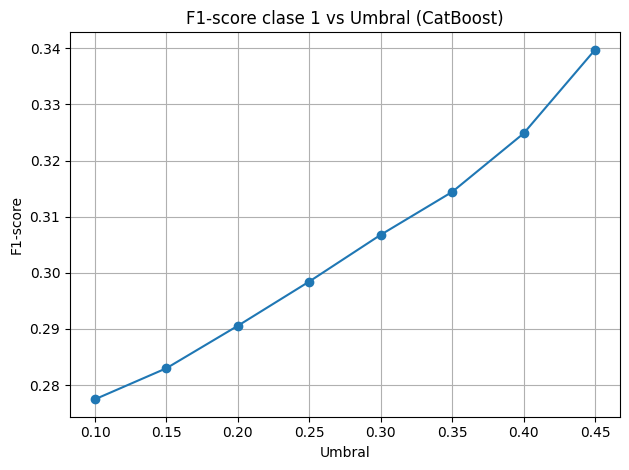


Reporte de Clasificación (Catboost):
              precision    recall  f1-score   support

           0       0.91      0.51      0.65      8045
           1       0.22      0.74      0.34      1533

    accuracy                           0.54      9578
   macro avg       0.57      0.62      0.49      9578
weighted avg       0.80      0.54      0.60      9578



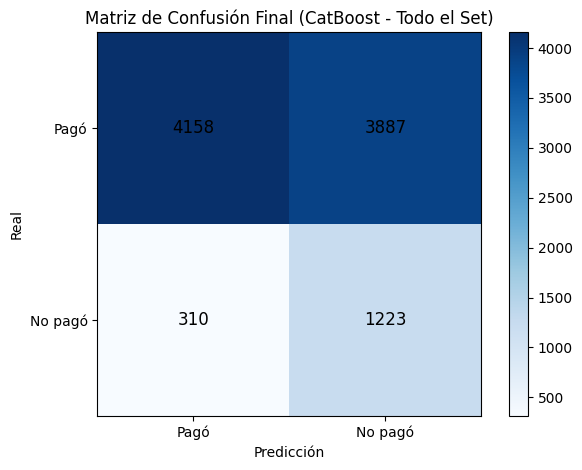


 Top 10 variables más importantes:
             Variable  Importancia
2            int.rate    19.275595
1             purpose    13.515565
4      log.annual.inc    10.522287
6                fico     9.714612
10     inq.last.6mths     8.684085
3         installment     7.975924
0       credit.policy     5.883108
7   days.with.cr.line     5.290568
9          revol.util     4.335455
5                 dti     3.224671


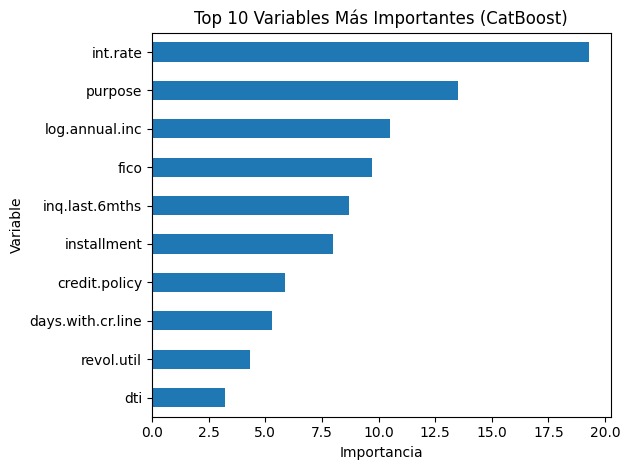

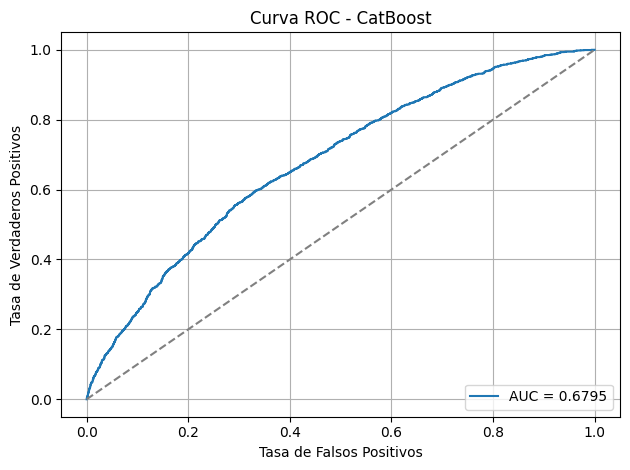

In [21]:
# Paquetes
from catboost import CatBoostClassifier # clasificador

# Separar en dos df's: X variables de entrada, Y variable de salida (not.fully.paid)
X = df_loan.drop("not.fully.paid", axis=1)
Y = df_loan["not.fully.paid"]

# Separarar las variables categoricas
cat_features = ['purpose', 'delinq.2yrs_binned']

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2500)

# Métrica objetivo F1 para clase 1
scorer = make_scorer(f1_score, pos_label=1)

# Hiperparámetros a evaluar
param_grid = {
    'iterations': [100, 200],
    'depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.001, 0.005],
    'verbose': [0]
}

# Modelo base
cat_model = CatBoostClassifier(
    loss_function='Logloss',
    random_state=2500,
    auto_class_weights='Balanced'
)

# GridSearchCV con validación cruzada y F1-score como métrica
grid = GridSearchCV(cat_model, param_grid, scoring=scorer, cv=skf, n_jobs=-1)
grid.fit(X, Y, cat_features=cat_features)
mejor_modelo = grid.best_estimator_
print(" Mejores hiperparámetros:", grid.best_params_)

# Mejor umbral
umbrales = np.arange(0.10, 0.50, 0.05)
Y_probabilidades = np.zeros_like(Y, dtype=float)
Y_reales = np.zeros_like(Y)

# Obtener probabilidades con validación cruzada
for train_idx, test_idx in skf.split(X, Y):
    # Para cada fold, se entrena el modelo utilizando únicamente los datos de entrenamiento de ese subconjunto 
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    mejor_modelo.fit(X_train, Y_train, cat_features=cat_features)
    
    # Luego se utiliza ese modelo para predecir las probabilidades de incumplimiento en el subconjunto de prueba
    probas = mejor_modelo.predict_proba(X_test)[:, 1]
    
    # Estas probabilidades se almacenan en la posición correspondiente del arreglo general
    Y_probabilidades[test_idx] = probas

    # También se registran las etiquetas reales correspondientes para ese subconjunto
    Y_reales[test_idx] = Y_test

# Evaluamos F1 para cada umbral
f1_scores = []
for umbral in umbrales:
    Y_pred = (Y_probabilidades >= umbral).astype(int)
    f1_scores.append(f1_score(Y_reales, Y_pred, pos_label=1))

mejor_umbral = umbrales[np.argmax(f1_scores)]
print(f"\n✅ Mejor umbral: {mejor_umbral:.2f}")
print(f"✅ Mejor F1-score (clase 1): {max(f1_scores):.4f}")

# Predicciones finales con mejor umbral
Y_final_pred = (Y_probabilidades >= mejor_umbral).astype(int)

# F1-score vs Umbral
plt.plot(umbrales, f1_scores, marker='o')
plt.title("F1-score clase 1 vs Umbral (CatBoost)")
plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Entrenar modelo final en todos los datos disponibles
mejor_modelo.fit(X, Y, cat_features=cat_features)

# Reporte final
print("\nReporte de Clasificación (Catboost):")
print(classification_report(Y, Y_final_pred))

# Predecir las probabilidades con el modelo entrenado sobre todo el set
Y_prob_final = mejor_modelo.predict_proba(X)[:, 1]

# Aplicar el mejor umbral encontrado para obtener predicción binaria
Y_final_pred = (Y_prob_final >= mejor_umbral).astype(int)

# Calcular la matriz de confusión final
matriz = confusion_matrix(Y, Y_final_pred)
plt.imshow(matriz, cmap="Blues")
plt.title("Matriz de Confusión Final (CatBoost - Todo el Set)")
plt.xlabel("Predicción")
plt.ylabel("Real")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(matriz[i, j]), ha='center', va='center', fontsize=12, color='black')
plt.colorbar()
plt.xticks([0, 1], ["Pagó", "No pagó"])
plt.yticks([0, 1], ["Pagó", "No pagó"])
plt.tight_layout()
plt.show()

# Obtener importancia
importancias = mejor_modelo.get_feature_importance()
nombres_columnas = X.columns

importancias_df = pd.DataFrame({
    "Variable": nombres_columnas,
    "Importancia":
importancias
}).sort_values(by="Importancia", ascending=False)

print("\n Top 10 variables más importantes:")
print(importancias_df.head(10))

# Gráfico de importancias
importancias_df.head(10).plot(kind="barh", x="Variable", y="Importancia", legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Variables Más Importantes (CatBoost)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(Y_reales, Y_probabilidades)
auc_score = roc_auc_score(Y_reales, Y_probabilidades)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - CatBoost")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
